In [1]:
import pandas as pd

combine_df = pd.read_csv('../data/curated/combine_all.csv')

In [4]:
df = combine_df.copy()

# Calculate the growth rate
df['2024_growth_rate'] = (df['estimated_2024_population'] - df['2023_population']) / df['2023_population'] * 100

# Assuming df is your DataFrame and you've already calculated 2024_growth_rate

# Step 1: Calculate the growth factor (1 + growth_rate/100)
df['2025_growth_factor'] = 1.01 + (df['2024_growth_rate'] / 100)

# Step 2: Estimate population for 2025 and 2026
df['estimated_2025_population'] = df['estimated_2024_population'] * df['2025_growth_factor']


# Step 3: Calculate growth rates for 2025 and 2026
df['2025_growth_rate'] = (df['estimated_2025_population'] - df['estimated_2024_population']) / df['estimated_2024_population'] * 100

df['2026_growth_factor'] = 1.01 + (df['2025_growth_rate'] / 100)
df['estimated_2026_population'] = df['estimated_2025_population'] * df['2026_growth_factor']
df['2026_growth_rate'] = (df['estimated_2026_population'] - df['estimated_2025_population']) / df['estimated_2025_population'] * 100


# Select only the relevant columns
result_df=df[['addressSuburb', '2023_population', 
              'estimated_2024_population', '2024_growth_rate',
              '2025_growth_rate', '2026_growth_rate']]


result = result_df.groupby('addressSuburb').mean().sort_values('2024_growth_rate', ascending=False).head(10)

result


,2023_population,estimated_2024_population,2024_growth_rate,2025_growth_rate,2026_growth_rate
addressSuburb,,,,,
CARLTON,21376.000000,25309.000000,18.399139,19.399139,20.399139
MELBOURNE,39819.516949,45509.381356,12.532195,13.532195,14.532195
MANOR LAKES,80341.000000,90071.000000,12.110877,13.110877,14.110877
MAMBOURIN,80341.000000,90071.000000,12.110877,13.110877,14.110877
MOUNT COTTRELL,80341.000000,90071.000000,12.110877,13.110877,14.110877
WYNDHAM VALE,80341.000000,90071.000000,12.110877,13.110877,14.110877
WEST MELBOURNE,8724.000000,9483.000000,8.700138,9.700138,10.700138
MELBOURNE 3004,13186.000000,14188.000000,7.598969,8.598969,9.598969
FOOTSCRAY,29532.000000,31749.000000,7.507111,8.507111,9.507111


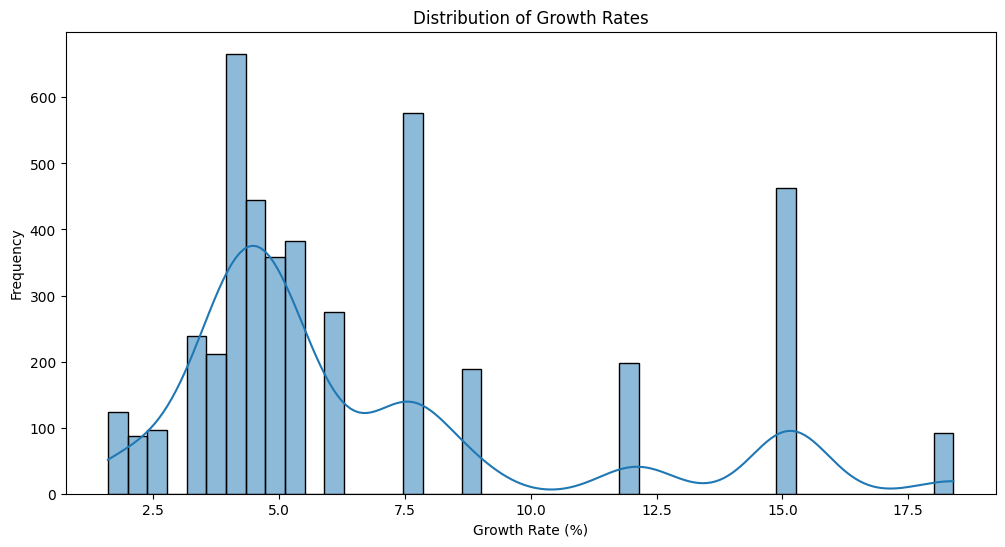

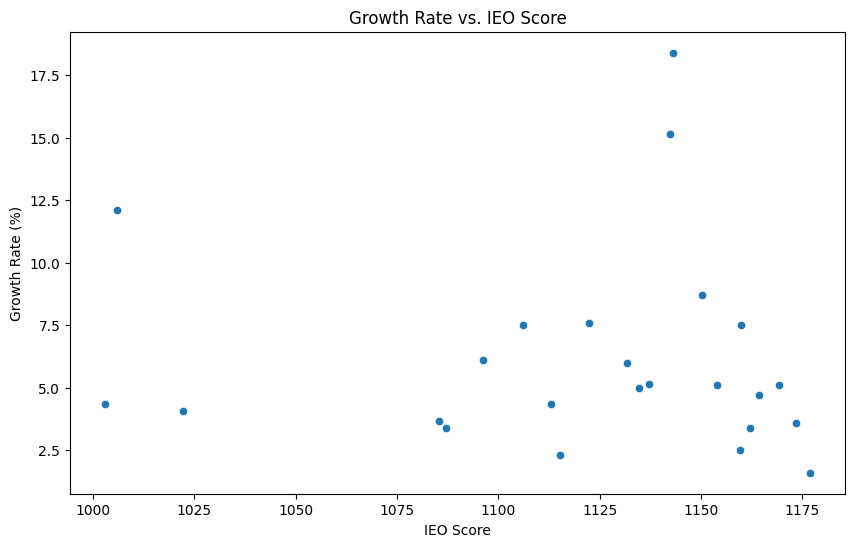

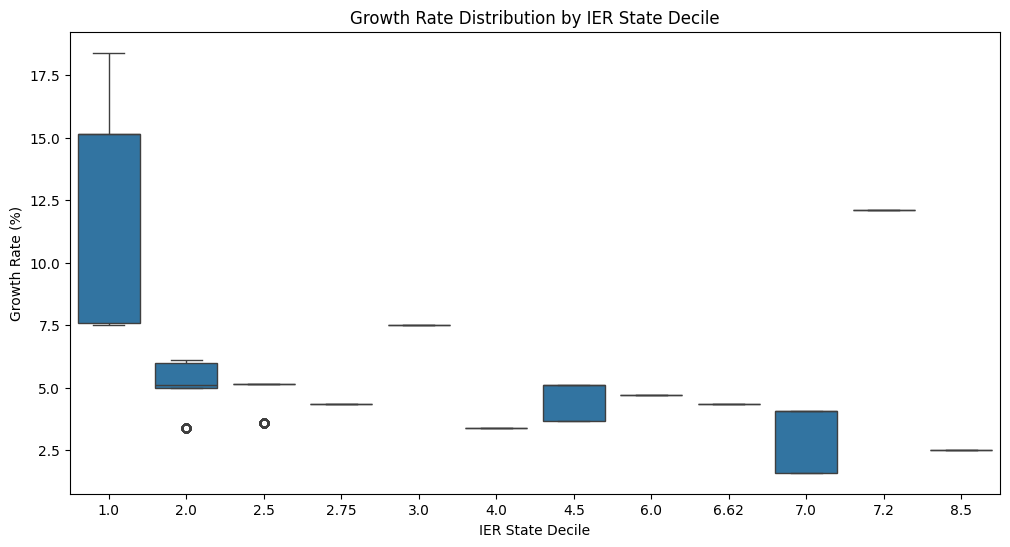

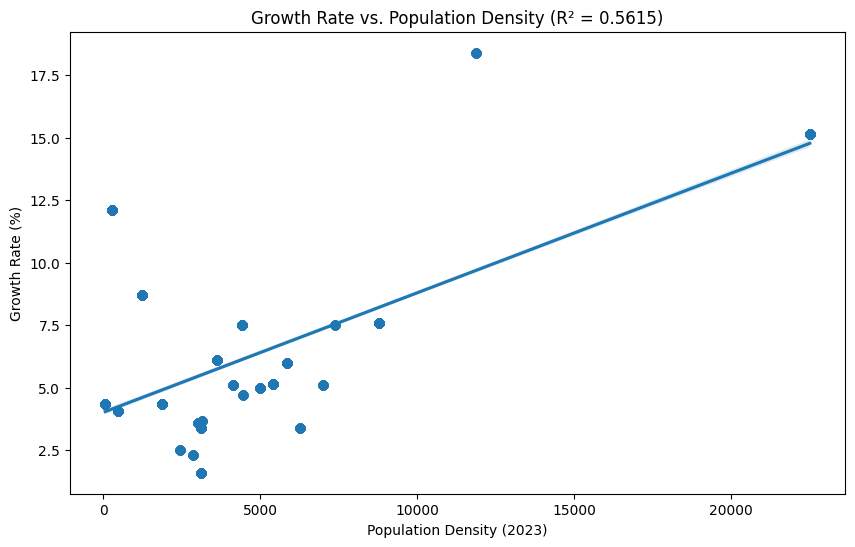


Correlation Matrix:
                                  growth_rate  IEO_Score  IER_Score  \
growth_rate                          1.000000   0.093709  -0.788130   
IEO_Score                            0.093709   1.000000  -0.496910   
IER_Score                           -0.788130  -0.496910   1.000000   
population_density_2023              0.749319   0.390249  -0.864239   
distance_to_closest_station         -0.071652  -0.314414   0.251586   
min_distance_to_university          -0.026804  -0.589292   0.305473   
min_distance_to_shopping_mall       -0.055395  -0.825636   0.460903   
min_distance_to_secondary_school    -0.061650  -0.561004   0.324443   
min_distance_to_primary_school      -0.031539  -0.457949   0.248639   
min_distance_to_park                 0.012706  -0.350764   0.150398   

                                  population_density_2023  \
growth_rate                                      0.749319   
IEO_Score                                        0.390249   
IER_Score     

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 2. Correlation analysis
correlation_columns = ['growth_rate', 'IEO_Score', 'IER_Score', 'population_density_2023', 
                       'distance_to_closest_station', 'min_distance_to_university', 
                       'min_distance_to_shopping_mall', 'min_distance_to_secondary_school', 
                       'min_distance_to_primary_school', 'min_distance_to_park']

correlation_matrix = df[correlation_columns].corr()

# 3. Growth rate distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['growth_rate'], kde=True)
plt.title('Distribution of Growth Rates')
plt.xlabel('Growth Rate (%)')
plt.ylabel('Frequency')
plt.show()

# 4. Scatter plot: Growth Rate vs. IEO Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IEO_Score', y='growth_rate', data=df)
plt.title('Growth Rate vs. IEO Score')
plt.xlabel('IEO Score')
plt.ylabel('Growth Rate (%)')
plt.show()

# 5. Box plot: Growth Rate by IER State Decile
plt.figure(figsize=(12, 6))
sns.boxplot(x='IER_State Decile', y='growth_rate', data=df)
plt.title('Growth Rate Distribution by IER State Decile')
plt.xlabel('IER State Decile')
plt.ylabel('Growth Rate (%)')
plt.show()

# 6. Regression analysis: Growth Rate vs. Population Density
slope, intercept, r_value, p_value, std_err = stats.linregress(df['population_density_2023'], df['growth_rate'])

plt.figure(figsize=(10, 6))
sns.regplot(x='population_density_2023', y='growth_rate', data=df, scatter_kws={'alpha':0.5})
plt.title(f'Growth Rate vs. Population Density (R² = {r_value**2:.4f})')
plt.xlabel('Population Density (2023)')
plt.ylabel('Growth Rate (%)')
plt.show()

print("\nCorrelation Matrix:")
print(correlation_matrix)

print(f"\nRegression Analysis - Growth Rate vs. Population Density:")
print(f"R-squared: {r_value**2:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
